In [1]:
import os
import keras
import random
from keras.applications.inception_v3 import preprocess_input# import inception_v3 as inc_net
from keras.preprocessing import image
from keras.models import load_model
from skimage.io import imread
from skimage.segmentation import mark_boundaries
#from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

print('Notebook run using keras:', keras.__version__)

Using TensorFlow backend.


Notebook run using keras: 2.2.4


In [2]:
img_size = 299
data_type = 'tabak'
# felzenszwalb, slic, quickshift, watershed (<-- need to be grey)
# LIME default = slic
#superpixel_fn = "SLIC"
path_to_labels = os.path.join('labels', data_type+'.txt')
file_name = os.path.join('trainedModels',
                         data_type,
                         'completetrain',
                         '16-10-18 1756__Epochs11_ImageSize299_BatchSize16')

def getHighestID(preds):
    id = 0
    max = -1
    for i in range(len(preds)):
        if preds[i]>max:
            max = preds[i]
            id=i
    return id

def getLabels():
    with open(path_to_labels, 'r') as f:
     myLabels = [line.strip() for line in f]
    return myLabels

def getLabelById(id):
    with open(path_to_labels) as fp:
        for i, line in enumerate(fp):
            if i == id:
                return line.replace('\n','')
    raise Exception('ID is not in file')
    
def decode_prediction(preds):
    label_list = getLabels()    
    decoded_list = list()
    decoded_list.append([])
    for i in range(len(label_list)):
        decoded_list[0].append([label_list[i],preds[i]])
    return decoded_list

def getIdByLabel(label):
    with open(path_to_labels) as fp:
        for i, line in enumerate(fp):
            if label == line.replace('\n',''):
                return i
    raise Exception('Label is not in file')

def transform_img_fn(path_list):
    out = []
    for img_path in path_list:
        img = image.load_img(img_path, target_size=(img_size, img_size))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        out.append(x)
    return np.vstack(out)

def getRandomImage():
    dir_list = [x[0] for x in os.walk(os.path.join('data',data_type,'test'))][1:]
    output = list()
    only_paths = list()
    for x in dir_list:
        output.append([random.choice(os.listdir(x)),os.path.basename(x)])
        only_paths.append(os.path.join(x,random.choice(os.listdir(x))))
    return output, only_paths    




In [3]:
my_model = load_model(file_name+".h5")
print('Model loaded> '+file_name)

Model loaded> trainedModels/flowers/completetrain/16-10-18 1756__Epochs11_ImageSize299_BatchSize16


In [4]:
output, images_paths = getRandomImage()
images = transform_img_fn(images_paths)
preds = my_model.predict(images)

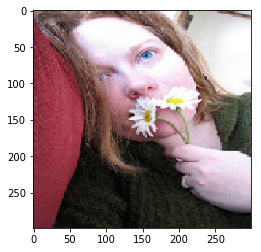

['daisy', 0.9999999]
['sunflowers', 9.800226e-08]
['tulips', 1.0119098e-10]
['roses', 2.8022328e-11]
['dandelion', 2.8497604e-12]
True


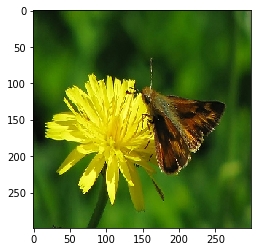

['dandelion', 0.99992204]
['daisy', 6.0521794e-05]
['sunflowers', 9.914022e-06]
['tulips', 6.8964478e-06]
['roses', 5.3224244e-07]
True


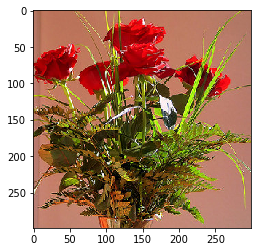

['tulips', 0.7165448]
['roses', 0.14937419]
['sunflowers', 0.13394465]
['dandelion', 0.000113922746]
['daisy', 2.2422195e-05]
False


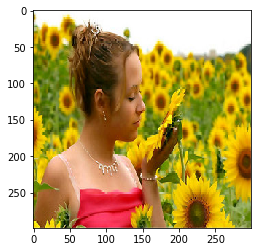

['sunflowers', 1.0]
['daisy', 4.7982066e-13]
['dandelion', 3.6357668e-17]
['tulips', 1.7083844e-17]
['roses', 3.7462065e-22]
True


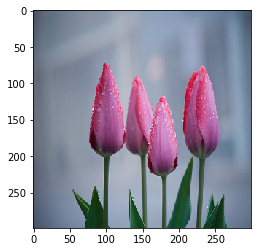

['tulips', 1.0]
['daisy', 4.478641e-10]
['sunflowers', 5.869715e-11]
['roses', 1.8850083e-11]
['dandelion', 6.313168e-12]
True


In [5]:
for i in range(len(images)):
    preds_with_labels = decode_prediction(preds[i])[0]
    preds_with_labels = sorted(preds_with_labels,key=lambda l:l[1], reverse=True)
    plt.figure()
    plt.imshow(images[i]/2 +0.5)
    plt.show()
    for x in preds_with_labels[:5]:
        print(x)
    isright = True if preds_with_labels[0][0] == output[i][1] else False
    print(isright)
    

In [6]:
%load_ext autoreload
%autoreload 2
import os,sys
try:
    import lime
except:
    sys.path.append(os.path.join('..', '..')) # add the current directory
    import lime
from lime import lime_image


In [7]:
explainer = lime_image.LimeImageExplainer()

In [10]:
%%time
# Hide color is the color for a superpixel turned OFF. Alternatively, if it is NONE, the superpixel will be replaced by the average of its pixels
explantions = list()
print(len(images))
superpixel_fn ="slic"

for image in images:
    explantions.append(explainer.explain_instance(image,
                                                  my_model.predict,
                                                  hide_color=None,
                                                  num_samples=100,
                                                  segmentation_fn=superpixel_fn
                                                 ))

5
slic


/home/eisbergsalat/.conda/envs/masterarbeit/lib/python3.6/site-packages/skimage/segmentation/slic_superpixels.py:156: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  segments_z = grid_z[slices]
/home/eisbergsalat/.conda/envs/masterarbeit/lib/python3.6/site-packages/skimage/segmentation/slic_superpixels.py:157: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  segments_y = grid_y[slices]
/home/eisbergsalat/.conda/envs/masterarbeit/lib/python3.6/site-packages/skimage/segmentation/slic_superpixels.py:158: FutureWarning: Using a non-tuple sequence 

slic


/home/eisbergsalat/.conda/envs/masterarbeit/lib/python3.6/site-packages/skimage/segmentation/slic_superpixels.py:156: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  segments_z = grid_z[slices]
/home/eisbergsalat/.conda/envs/masterarbeit/lib/python3.6/site-packages/skimage/segmentation/slic_superpixels.py:157: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  segments_y = grid_y[slices]
/home/eisbergsalat/.conda/envs/masterarbeit/lib/python3.6/site-packages/skimage/segmentation/slic_superpixels.py:158: FutureWarning: Using a non-tuple sequence 

slic


/home/eisbergsalat/.conda/envs/masterarbeit/lib/python3.6/site-packages/skimage/segmentation/slic_superpixels.py:156: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  segments_z = grid_z[slices]
/home/eisbergsalat/.conda/envs/masterarbeit/lib/python3.6/site-packages/skimage/segmentation/slic_superpixels.py:157: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  segments_y = grid_y[slices]
/home/eisbergsalat/.conda/envs/masterarbeit/lib/python3.6/site-packages/skimage/segmentation/slic_superpixels.py:158: FutureWarning: Using a non-tuple sequence 

slic


/home/eisbergsalat/.conda/envs/masterarbeit/lib/python3.6/site-packages/skimage/segmentation/slic_superpixels.py:156: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  segments_z = grid_z[slices]
/home/eisbergsalat/.conda/envs/masterarbeit/lib/python3.6/site-packages/skimage/segmentation/slic_superpixels.py:157: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  segments_y = grid_y[slices]
/home/eisbergsalat/.conda/envs/masterarbeit/lib/python3.6/site-packages/skimage/segmentation/slic_superpixels.py:158: FutureWarning: Using a non-tuple sequence 

slic


/home/eisbergsalat/.conda/envs/masterarbeit/lib/python3.6/site-packages/skimage/segmentation/slic_superpixels.py:156: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  segments_z = grid_z[slices]
/home/eisbergsalat/.conda/envs/masterarbeit/lib/python3.6/site-packages/skimage/segmentation/slic_superpixels.py:157: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  segments_y = grid_y[slices]
/home/eisbergsalat/.conda/envs/masterarbeit/lib/python3.6/site-packages/skimage/segmentation/slic_superpixels.py:158: FutureWarning: Using a non-tuple sequence 

CPU times: user 10.1 s, sys: 753 ms, total: 10.8 s
Wall time: 6.99 s


daisy


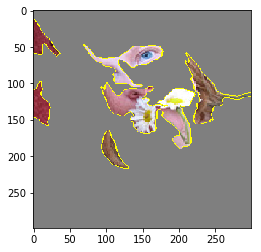

dandelion


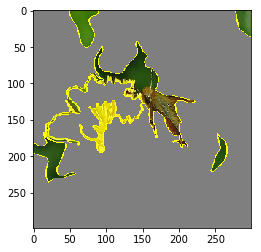

tulips


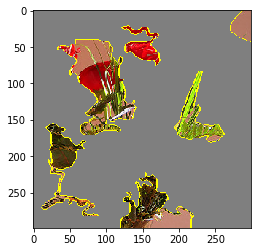

sunflowers


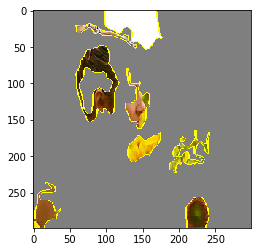

tulips


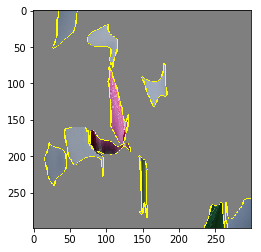

In [13]:
for i in range(len(explantions)):
    if data_type == 'tabak':
        temp, mask = explantions[i].get_image_and_mask(0,
                                                   positive_only=True,
                                                   hide_rest=True,
                                                   num_features=50)
        print(getLabelById(getHighestID(preds[i])))
        plt.figure()
        plt.title(getLabelById(0))
        plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
        plt.show()
        temp, mask = explantions[i].get_image_and_mask(1,
                                                   positive_only=True,
                                                   hide_rest=True,
                                                   num_features=50)
        plt.figure()
        plt.title(getLabelById(1))
        plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
        plt.show()
        print("_________")        
    else:
        temp, mask = explantions[i].get_image_and_mask(getHighestID(preds[i]),
                                                   positive_only=True,
                                                   hide_rest=True,
                                                   num_features=10)
        print(getLabelById(getHighestID(preds[i]))) 
        plt.figure()
        plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
        plt.show()